In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline

In [2]:
#reading in csv
df = pd.read_csv('crime.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499924 entries, 0 to 499923
Data columns (total 19 columns):
INCIDENT_ID               499924 non-null int64
OFFENSE_ID                499924 non-null int64
OFFENSE_CODE              499924 non-null int64
OFFENSE_CODE_EXTENSION    499924 non-null int64
OFFENSE_TYPE_ID           499924 non-null object
OFFENSE_CATEGORY_ID       499924 non-null object
FIRST_OCCURRENCE_DATE     499924 non-null object
LAST_OCCURRENCE_DATE      158159 non-null object
REPORTED_DATE             499924 non-null object
INCIDENT_ADDRESS          450974 non-null object
GEO_X                     495804 non-null float64
GEO_Y                     495804 non-null float64
GEO_LON                   495804 non-null float64
GEO_LAT                   495804 non-null float64
DISTRICT_ID               499924 non-null int64
PRECINCT_ID               499924 non-null int64
NEIGHBORHOOD_ID           499924 non-null object
IS_CRIME                  499924 non-null int64
IS_TRAFFIC

In [4]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [5]:
#converting potential index of reported crime date to datetime pandas
df['REPORTED_DATE']= pd.to_datetime(df['REPORTED_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499924 entries, 0 to 499923
Data columns (total 19 columns):
INCIDENT_ID               499924 non-null int64
OFFENSE_ID                499924 non-null int64
OFFENSE_CODE              499924 non-null int64
OFFENSE_CODE_EXTENSION    499924 non-null int64
OFFENSE_TYPE_ID           499924 non-null object
OFFENSE_CATEGORY_ID       499924 non-null object
FIRST_OCCURRENCE_DATE     499924 non-null object
LAST_OCCURRENCE_DATE      158159 non-null object
REPORTED_DATE             499924 non-null datetime64[ns]
INCIDENT_ADDRESS          450974 non-null object
GEO_X                     495804 non-null float64
GEO_Y                     495804 non-null float64
GEO_LON                   495804 non-null float64
GEO_LAT                   495804 non-null float64
DISTRICT_ID               499924 non-null int64
PRECINCT_ID               499924 non-null int64
NEIGHBORHOOD_ID           499924 non-null object
IS_CRIME                  499924 non-null int64
IS

In [6]:
#comparison of crime vs traffic
df.IS_CRIME.value_counts()

1    369905
0    130019
Name: IS_CRIME, dtype: int64

In [7]:
df.IS_TRAFFIC.value_counts()

0    369638
1    130286
Name: IS_TRAFFIC, dtype: int64

In [8]:
#dropping traffic to focus on crime, non-traffic
df = df[df.IS_TRAFFIC == 0]
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [9]:
df.OFFENSE_CATEGORY_ID.unique()

array(['all-other-crimes', 'larceny', 'theft-from-motor-vehicle',
       'drug-alcohol', 'auto-theft', 'white-collar-crime', 'burglary',
       'public-disorder', 'aggravated-assault',
       'other-crimes-against-persons', 'robbery', 'sexual-assault',
       'murder', 'arson'], dtype=object)

In [10]:
df.OFFENSE_CATEGORY_ID.value_counts()

all-other-crimes                90597
public-disorder                 52097
larceny                         50619
theft-from-motor-vehicle        37608
drug-alcohol                    32990
auto-theft                      26629
burglary                        24593
other-crimes-against-persons    24539
aggravated-assault              11735
white-collar-crime               6759
robbery                          6453
sexual-assault                   4123
arson                             626
murder                            270
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [11]:
df.NEIGHBORHOOD_ID.unique()

array(['montbello', 'gateway-green-valley-ranch', 'wellshire', 'belcaro',
       'cherry-creek', 'city-park-west', 'villa-park', 'speer',
       'highland', 'goldsmith', 'ruby-hill', 'cory-merrill',
       'jefferson-park', 'windsor', 'lincoln-park',
       'washington-park-west', 'stapleton', 'elyria-swansea',
       'hampden-south', 'dia', 'platt-park', 'west-colfax',
       'harvey-park-south', 'baker', 'cheesman-park', 'cbd', 'rosedale',
       'barnum-west', 'west-highland', 'chaffee-park', 'lowry-field',
       'north-park-hill', 'washington-virginia-vale', 'barnum',
       'sunnyside', 'westwood', 'civic-center', 'northeast-park-hill',
       'country-club', 'five-points', 'sun-valley', 'university-hills',
       'virginia-village', 'east-colfax', 'congress-park', 'hampden',
       'globeville', 'north-capitol-hill', 'berkeley', 'auraria',
       'sloan-lake', 'university', 'washington-park', 'hilltop',
       'university-park', 'college-view-south-platte', 'capitol-hill',
     

In [12]:
df.OFFENSE_TYPE_ID.unique()

array(['weapon-unlawful-discharge-of', 'theft-other',
       'theft-items-from-vehicle', 'theft-shoplift', 'traf-other',
       'theft-parts-from-vehicle', 'criminal-trespassing',
       'drug-methampetamine-possess', 'theft-of-motor-vehicle',
       'fraud-by-use-of-computer', 'burglary-business-by-force',
       'theft-embezzle', 'threats-to-injure', 'theft-from-bldg',
       'liquor-possession', 'aggravated-assault',
       'criminal-mischief-mtr-veh', 'kidnap-adult-victim',
       'violation-of-restraining-order', 'criminal-mischief-other',
       'assault-simple', 'harassment-stalking-dv',
       'vehicular-eluding-no-chase', 'robbery-street',
       'public-order-crimes-other', 'drug-synth-narcotic-possess',
       'burglary-residence-by-force', 'burglary-business-no-force',
       'contraband-into-prison', 'criminal-mischief-graffiti',
       'drug-heroin-possess', 'drug-poss-paraphernalia',
       'burglary-residence-no-force', 'traf-habitual-offender',
       'theft-bicycle', 

In [13]:
#dropping many columns to focus on 
df = df.drop(['OFFENSE_ID', 'OFFENSE_CODE', "OFFENSE_CODE_EXTENSION", "OFFENSE_TYPE_ID", "FIRST_OCCURRENCE_DATE", "LAST_OCCURRENCE_DATE", "IS_TRAFFIC"], axis=1)

df.head()

,INCIDENT_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME
0,2016376978,all-other-crimes,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1
1,20186000994,larceny,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1
2,20166003953,theft-from-motor-vehicle,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1
3,201872333,larceny,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1
4,2017411405,larceny,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1


In [14]:
#casting category id as category and then dummies
df["OFFENSE_CATEGORY_ID"] = df["OFFENSE_CATEGORY_ID"].astype('category')
df.dtypes

INCIDENT_ID                     int64
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
INCIDENT_ADDRESS               object
GEO_X                         float64
GEO_Y                         float64
GEO_LON                       float64
GEO_LAT                       float64
DISTRICT_ID                     int64
PRECINCT_ID                     int64
NEIGHBORHOOD_ID                object
IS_CRIME                        int64
dtype: object

In [15]:
df["OFFENSE_CAT"] = df["OFFENSE_CATEGORY_ID"].cat.codes
df.head()

,INCIDENT_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,OFFENSE_CAT
0,2016376978,all-other-crimes,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,1
1,20186000994,larceny,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,6
2,20166003953,theft-from-motor-vehicle,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,12
3,201872333,larceny,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,6
4,2017411405,larceny,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,6


In [16]:
dfdummies = pd.get_dummies(df, columns=["OFFENSE_CATEGORY_ID"])

dfdummies.head()

,INCIDENT_ID,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,...,OFFENSE_CATEGORY_ID_burglary,OFFENSE_CATEGORY_ID_drug-alcohol,OFFENSE_CATEGORY_ID_larceny,OFFENSE_CATEGORY_ID_murder,OFFENSE_CATEGORY_ID_other-crimes-against-persons,OFFENSE_CATEGORY_ID_public-disorder,OFFENSE_CATEGORY_ID_robbery,OFFENSE_CATEGORY_ID_sexual-assault,OFFENSE_CATEGORY_ID_theft-from-motor-vehicle,OFFENSE_CATEGORY_ID_white-collar-crime
0,2016376978,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,...,0,0,0,0,0,0,0,0,0,0
1,20186000994,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,...,0,0,1,0,0,0,0,0,0,0
2,20166003953,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,...,0,0,0,0,0,0,0,0,1,0
3,201872333,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,...,0,0,1,0,0,0,0,0,0,0
4,2017411405,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,...,0,0,1,0,0,0,0,0,0,0


/Users/michael/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


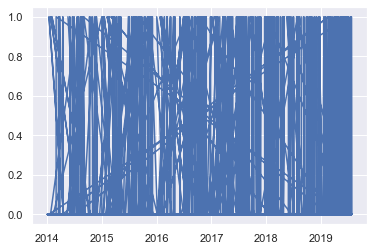

In [17]:
time = dfdummies['REPORTED_DATE']
data = dfdummies['OFFENSE_CATEGORY_ID_murder']

#charting dummies of murders over time, broken plot, 'ro' as a param on .plot() provides a better plot to note
plt.plot(time, data)
plt.show()

In [18]:
#dummy dataframe with REPORTED_DATE index creation
dfdumts = dfdummies.set_index('REPORTED_DATE')

dfdumts.head()

,INCIDENT_ID,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,...,OFFENSE_CATEGORY_ID_burglary,OFFENSE_CATEGORY_ID_drug-alcohol,OFFENSE_CATEGORY_ID_larceny,OFFENSE_CATEGORY_ID_murder,OFFENSE_CATEGORY_ID_other-crimes-against-persons,OFFENSE_CATEGORY_ID_public-disorder,OFFENSE_CATEGORY_ID_robbery,OFFENSE_CATEGORY_ID_sexual-assault,OFFENSE_CATEGORY_ID_theft-from-motor-vehicle,OFFENSE_CATEGORY_ID_white-collar-crime
REPORTED_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,...,0,0,0,0,0,0,0,0,0,0
2018-01-29 17:53:00,20186000994,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,...,0,0,1,0,0,0,0,0,0,0
2016-04-26 21:02:00,20166003953,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,...,0,0,0,0,0,0,0,0,1,0
2018-01-30 22:29:00,201872333,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,...,0,0,1,0,0,0,0,0,0,0
2017-06-23 16:09:00,2017411405,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,...,0,0,1,0,0,0,0,0,0,0


In [19]:
dfdumts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 369638 entries, 2016-06-15 23:31:00 to 2018-12-12 16:42:00
Data columns (total 25 columns):
INCIDENT_ID                                         369638 non-null int64
INCIDENT_ADDRESS                                    336140 non-null object
GEO_X                                               365518 non-null float64
GEO_Y                                               365518 non-null float64
GEO_LON                                             365518 non-null float64
GEO_LAT                                             365518 non-null float64
DISTRICT_ID                                         369638 non-null int64
PRECINCT_ID                                         369638 non-null int64
NEIGHBORHOOD_ID                                     369638 non-null object
IS_CRIME                                            369638 non-null int64
OFFENSE_CAT                                         369638 non-null int8
OFFENSE_CATEGORY_ID_aggravated-a

In [20]:
'''Plotting time: 
Most dangerous vs. safest neighborhoods/precinct/district over time window
Types of crime over window
Crime by month overall/month of each year/year/etc
--> 
Whatever comes out of interesting results from these plots.'''